In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

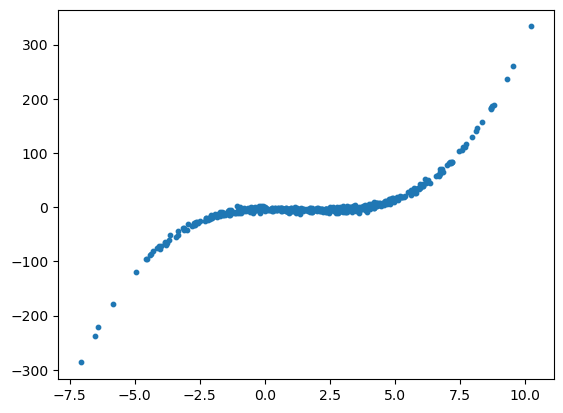

In [15]:
def generate_dataset1():
    n = 500
    X = 2 - 3 * np.random.normal(0, 1, n)
    y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, n)
    plt.scatter(X, y, s=10)
    plt.show()
    return X, y

X, y = generate_dataset1()

data = {'X': X, 'y': y}
df = pd.DataFrame(data)

In [16]:
df.head()

,X,y
0,4.797870,9.548122
1,4.447362,4.126732
2,-4.569565,-95.632547
3,-2.083685,-13.778610
4,0.912727,-4.837772


In [18]:
# Fit a linear model on the data
X = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Get the predictions on the entire data using the .predict() function
y_lin_pred = model.predict(X)

In [20]:
# Now, we try polynomial regression
guess_degree = 3

# Generate polynomial features on the entire data
x_poly= PolynomialFeatures(degree=guess_degree).fit_transform(X, y)


In [21]:
#Fit a polynomial model on the data, using x_poly as features
# Note: since PolynomialFeatures adds an intercept by default
# we will set fit_intercept to False to avoid having 2 intercepts
polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(x_poly,y)

y_poly_pred = polymodel.predict(x_poly)

In [22]:
# To visualise the results, we create a linspace of evenly spaced values
# This ensures that there are no gaps in our prediction line as well as
# avoiding the need to create a sorted set of our data.
# Worth examining and understand the code 

# create an array of evenly spaced values
x_l = np.linspace(np.min(X),np.max(X),100).reshape(-1, 1)

# Prediction on the linspace values
y_lin_pred_l = model.predict(x_l)

# PolynomialFeatures on the linspace values
x_poly_l= PolynomialFeatures(degree=guess_degree).fit_transform(x_l)

# Prediction on the polynomial linspace values
y_poly_pred_l = polymodel.predict(x_poly_l)

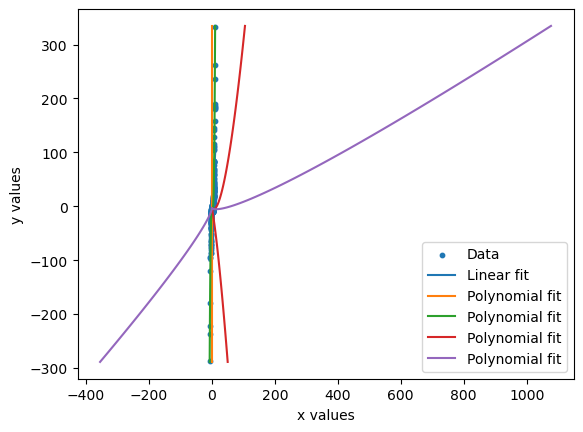

In [24]:
# First plot x & y values using plt.scatter
plt.scatter(X, y, s=10, label="Data")

# Now, plot the linear regression fit curve (using linspace)
plt.plot(x_l,y_lin_pred_l,label="Linear fit")

# Also plot the polynomial regression fit curve (using linspace)
plt.plot(x_poly_l, y_poly_pred_l, label="Polynomial fit")

#Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [25]:
### edTest(test_poly_predictions) ###
#Calculate the residual values for the polynomial model
poly_residuals = y - y_poly_pred

In [26]:
### edTest(test_linear_predictions) ###
#Calculate the residual values for the linear model
lin_residuals = y - y_lin_pred

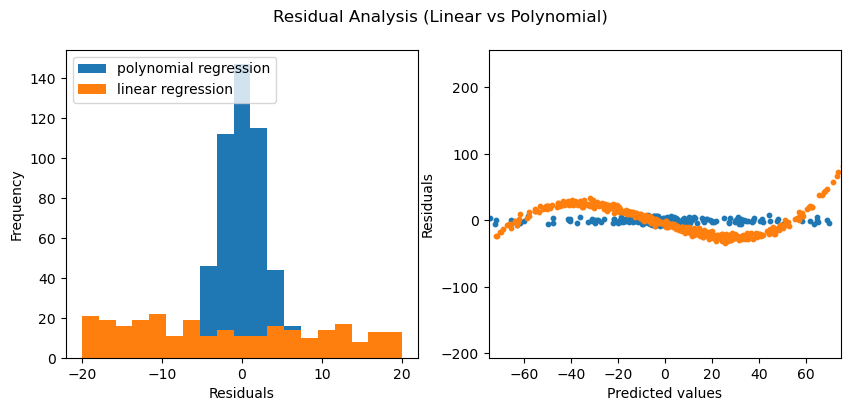

In [27]:
#Use the below helper code to plot residual values
#Plot the histograms of the residuals for the two cases

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

#Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins,label = 'polynomial regression')

#Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'linear regression')

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10)
ax[1].scatter(y_lin_pred, lin_residuals, s = 10 )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)');